In [1]:
!pip install nlp


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 14.4 MB/s eta 0:00:00


In [2]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()


print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.19.0


In [10]:
import pandas as pd

df = pd.read_pickle("merged_training.pkl")

In [11]:
df

,text,emotions
27383,i feel awful about it too because it s my job ...,sadness
110083,im alone i feel awful,sadness
140764,ive probably mentioned this before but i reall...,joy
100071,i was feeling a little low few days back,sadness
2837,i beleive that i am much more sensitive to oth...,love
...,...,...
566,that was what i felt when i was finally accept...,joy
36236,i take every day as it comes i m just focussin...,fear
76229,i just suddenly feel that everything was fake,sadness
131640,im feeling more eager than ever to claw back w...,joy


In [24]:
from google.colab import files
uploaded = files.upload()

Saving test.txt to test.txt


In [25]:
from google.colab import files
uploaded = files.upload()

Saving train.txt to train.txt


In [26]:
from google.colab import files
uploaded = files.upload()

Saving val.txt to val.txt


In [100]:
import pandas as pd

train = pd.read_csv(
    "train.txt",
    sep=";",
    names=["text","label"])

val = pd.read_csv(
    "val.txt",
    sep=";",
    names=["text","label"])

test = pd.read_csv(
    "test.txt",
    sep=";",
    names=["text","label"])

In [34]:
train.head()


,text,label
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [37]:
def get_tweet(data):
    tweets = data["text"]
    labels = data["label"]
    return tweets, labels
  # it returns all the text messages and labels lists

In [38]:
tweets, labels = get_tweet(train)
print(tweets[50]," : ", labels[50])
# it gives 51st text and label of train data

i need to feel the dough to make sure its just perfect  :  joy


In [41]:
def data_description(data):
    shape = data.shape
    # it gives the shape of the data (rows, columns)
    text_nulls = data["text"].isnull().sum()
    # gives no of null values in the data
    label_nulls = data["label"].isnull().sum()
    label_count = data["label"].value_counts()
    # gives how amny time each label was there

    plt.hist(data["label"])
    plt.xlabel('emotions')
    plt.ylabel('Frequency')
    plt.title('data distribution')

    print("data shape : ",shape)
    print("null values in text field : ", text_nulls)
    print("null values in text field : ", label_nulls)
    print("label counts")
    print(label_count)
    plt.show()

Training data description
data shape :  (16000, 2)
null values in text field :  0
null values in text field :  0
label counts
label
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64


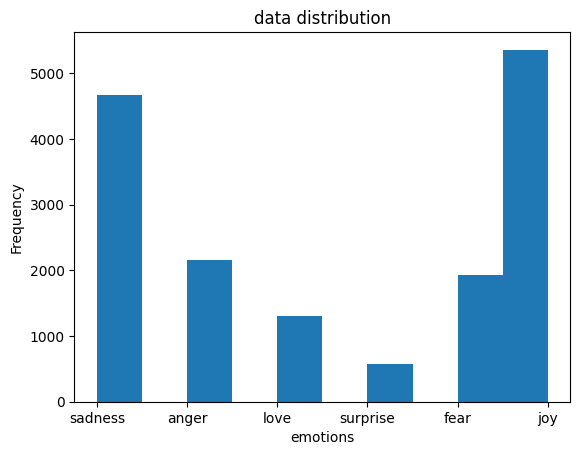

In [40]:
print("Training data description")
data_description(train)

Test data description
data shape :  (2000, 2)
null values in text field :  0
null values in text field :  0
label counts
label
joy         695
sadness     581
anger       275
fear        224
love        159
surprise     66
Name: count, dtype: int64


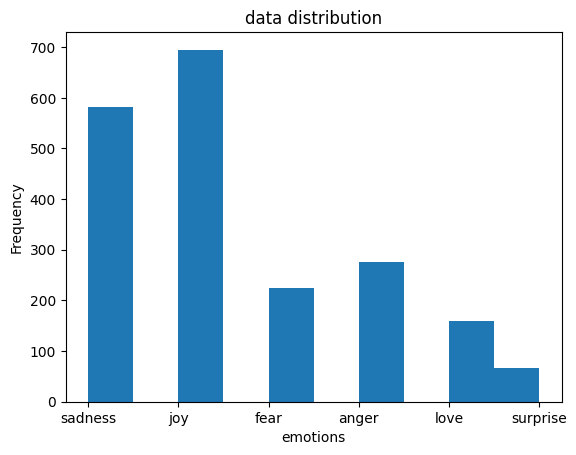

In [42]:
print("Test data description")
data_description(test)


Validation data description
data shape :  (2000, 2)
null values in text field :  0
null values in text field :  0
label counts
label
joy         704
sadness     550
anger       275
fear        212
love        178
surprise     81
Name: count, dtype: int64


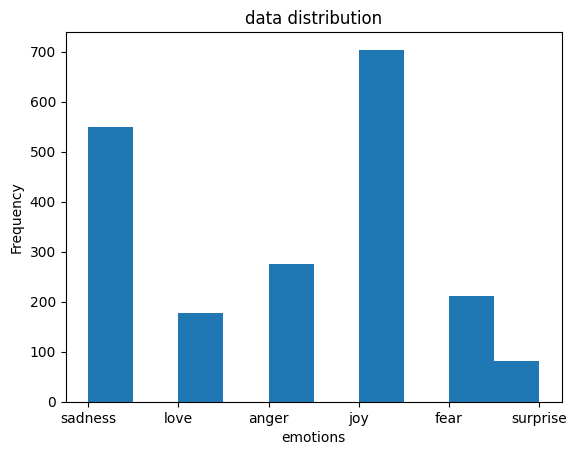

In [43]:
print("Validation data description")
data_description(val)

In [44]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [48]:
tokenizer = Tokenizer(num_words=10000, oov_token="")
tokenizer.fit_on_texts(tweets)
# num_words 10000 means it remembers only the top 10000 words and ignore reamining words
# ignored words are set Out of Vocabulary token
# OOV token is set to an empty string.

In [49]:
print(tweets[50])
tokenizer.texts_to_sequences([tweets[50]])

i need to feel the dough to make sure its just perfect


[[2, 105, 5, 3, 6, 7419, 5, 80, 158, 79, 32, 356]]

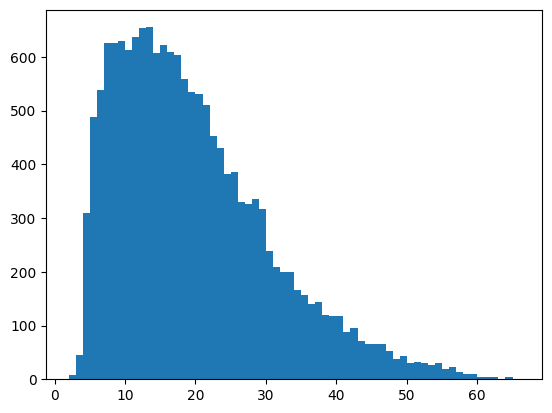

In [50]:
lengths = [len(s.split()) for s in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()
#X-axis → number of words in a tweet
#Y-axis → how many tweets have that word count


In [52]:
# We notice that most of the tweets have less than 50 words
maxlen = 50

from tensorflow.keras.preprocessing.sequence import pad_sequences
#a function used to make all sequences the same length.

In [53]:
# we need to pad or truncate the sequences to a fixed length, specified by the variable "maxlen".
# This is to ensure that all sequences have the same length, which is necessary for some models to work.
def get_sequences(tokenizer, tweets):
    sequences = tokenizer.texts_to_sequences(tweets)
    padded_sequences = pad_sequences(sequences, truncating='post', padding='post', maxlen=maxlen)
    return padded_sequences
#If a sequence is shorter than maxlen → zeros are added at the end (padding='post')
#If a sequence is longer than maxlen → extra words are cut off from the end (truncating='post')

In [54]:
padded_train_sequences = get_sequences(tokenizer, tweets)

In [66]:
padded_train_sequences[50]
# it gives the paddes numeric sequence for the 51st tweet

array([   2,  105,    5,    3,    6, 7419,    5,   80,  158,   79,   32,
        356,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0], dtype=int32)

In [67]:
print(tweets[50])
#original tweet
print(tokenizer.texts_to_sequences([tweets[50]]))
#tokenized tweet
print(padded_train_sequences[50])
# padded plus tokenized tweet

i need to feel the dough to make sure its just perfect
[[2, 105, 5, 3, 6, 7419, 5, 80, 158, 79, 32, 356]]
[   2  105    5    3    6 7419    5   80  158   79   32  356    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0]


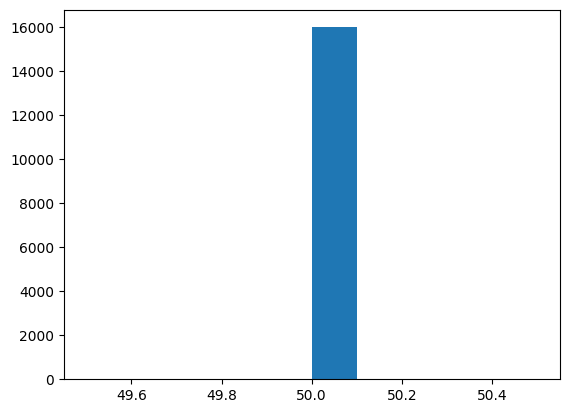

In [69]:
lengths = [len(l) for l in padded_train_sequences]
plt.hist(lengths)
plt.show()
# checks if all the tweets have the same length

In [72]:
classes = set(labels)
classes

{'anger', 'fear', 'joy', 'love', 'sadness', 'surprise'}

In [73]:
class_to_index = dict((c,i) for i, c in enumerate(classes))
index_to_class = dict((value,key) for key, value in class_to_index.items())

In [74]:
class_to_index

{'surprise': 0, 'love': 1, 'joy': 2, 'anger': 3, 'sadness': 4, 'fear': 5}

In [75]:
index_to_class

{0: 'surprise', 1: 'love', 2: 'joy', 3: 'anger', 4: 'sadness', 5: 'fear'}

In [76]:
labels_to_ids = lambda labels : np.array([class_to_index.get(x) for x in labels])

In [80]:
ids_to_labels = lambda ids : np.array([index_to_class.get(x) for x in ids])

In [86]:
train_labels = labels_to_ids(labels)
print(train_labels[50])
print(labels[50])

2
joy


In [87]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=maxlen),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [88]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
val_tweets, val_labels = get_tweet(val)
val_sequences = get_sequences(tokenizer, val_tweets)
val_labels = labels_to_ids(val_labels)

In [90]:
val_tweets[69], val_labels[69]


('i have no extra money im worried all of the time and i feel so beyond pathetic',
 np.int64(4))

In [91]:
m = model.fit(
    padded_train_sequences,
    train_labels,
    validation_data=(val_sequences, val_labels),
    epochs=20,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience = 2)
    ]
)

Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 34s 53ms/step - accuracy: 0.3837 - loss: 1.5308 - val_accuracy: 0.7295 - val_loss: 0.7731
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.7968 - loss: 0.6035 - val_accuracy: 0.8290 - val_loss: 0.5214
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.8871 - loss: 0.3368 - val_accuracy: 0.8510 - val_loss: 0.4509
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 53ms/step - accuracy: 0.9234 - loss: 0.2445 - val_accuracy: 0.8385 - val_loss: 0.4925
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 52ms/step - accuracy: 0.9464 - loss: 0.1701 - val_accuracy: 0.8750 - val_loss: 0.4112
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 41s 52ms/step - accuracy: 0.9641 - loss: 0.1217 - val_accuracy: 0.8735 - val_loss: 0.4012
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 27s 54ms/step - accuracy: 0.9675 - loss: 0.1106 - val_accuracy: 0.8820 - val_loss: 0.3825
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 26s 51ms/step - accuracy: 0.9737 - loss: 0.0874 - 

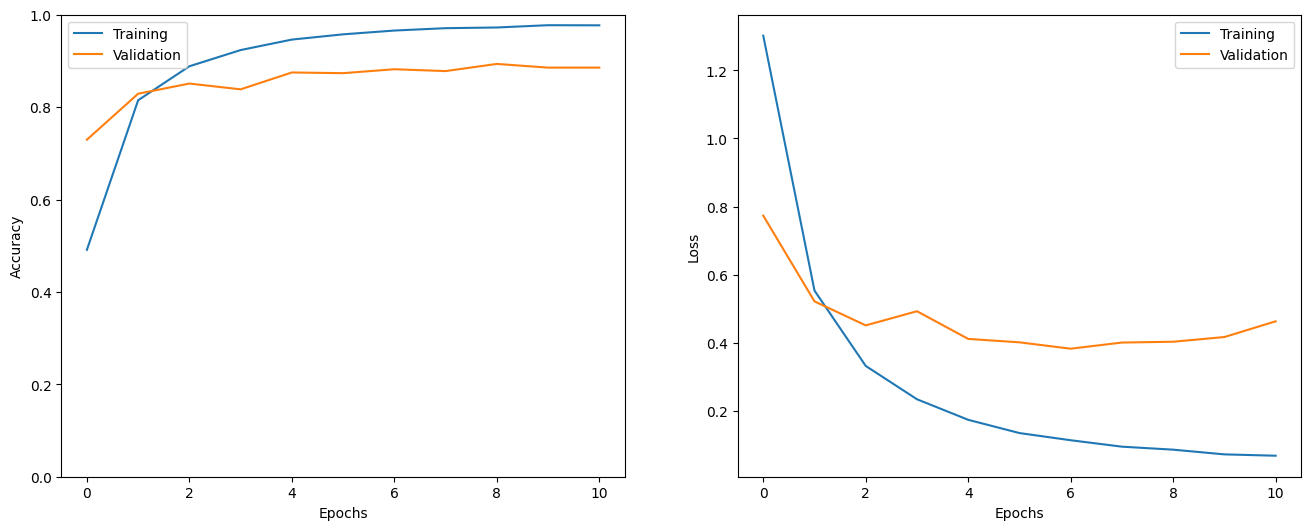

In [92]:
show_history(m)

In [94]:
test_tweets, test_labels = get_tweet(test)
test_sequences = get_sequences(tokenizer, test_tweets)
test_labels = labels_to_ids(test_labels)

In [95]:
_ = model.evaluate(test_sequences, test_labels)

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.8786 - loss: 0.4602


In [96]:
for _ in range(5):
    i = random.randint(0, len(test_labels)-1)
    print("Tweet : ", test_tweets[i]," ==> label : ",index_to_class[test_labels[i]])
    p = model.predict(np.expand_dims(test_sequences[i], axis=0))[0]
    pred_class = index_to_class[np.argmax(p).astype('uint8')]
    print("predicted label : ", pred_class)
    print("-----------------------")

Tweet :  i love to dance but often feel inhibited by my own body unsure what i am capable of hyper concerned about other people watching me and having opinions on my style or just feeling awkward as if i have no idea what i am supposed to do here  ==> label :  fear
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
predicted label :  anger
-----------------------
Tweet :  i feel any better  ==> label :  joy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
predicted label :  joy
-----------------------
Tweet :  i feel like i should not be surprised at this development  ==> label :  surprise
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
predicted label :  surprise
-----------------------
Tweet :  i always feel a little jealous of my son because when i joined the church i went almost directly into young women so i didnt learn the primary songs  ==> label :  anger
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
predicted label :  anger
-----------------------
Tweet :  i am not feeling too bad except that my ribs are aching and i ha

In [97]:
# predictions = model.predict_classes(test_sequences)
predict_x=model.predict(test_sequences)
classes_x=np.argmax(predict_x,axis=1)

63/63 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step


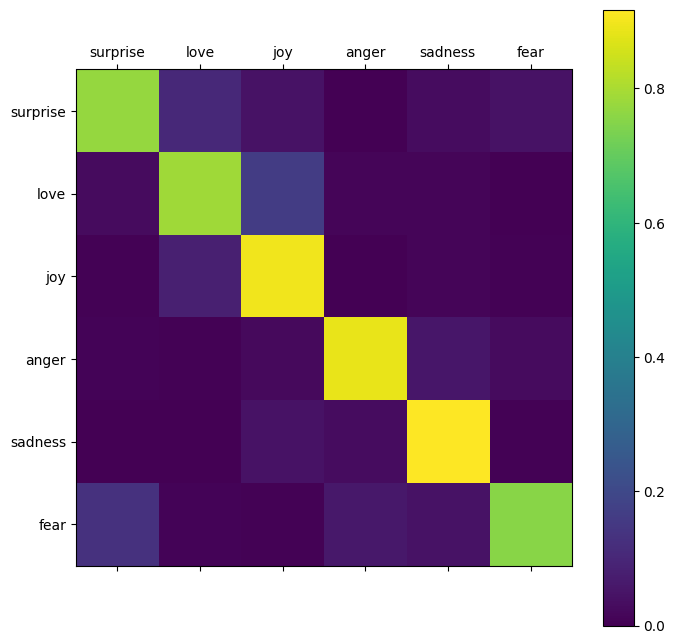

In [112]:
show_confusion_matrix(test_labels, classes_x, list(classes))

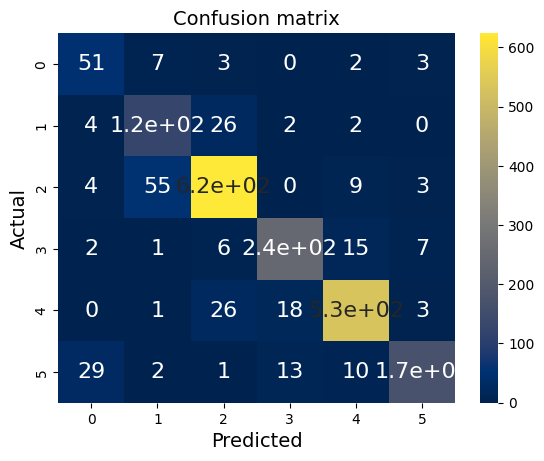

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

cnf_matrix = confusion_matrix(test_labels, classes_x)
p = sns.heatmap(cnf_matrix,
                annot=True,
                cmap="cividis",
                annot_kws={"size": 16})
plt.title('Confusion matrix', size=14)
plt.ylabel('Actual', size=14)
plt.xlabel('Predicted', size=14);